**THUSHAL BABUKUMAR - 46154469**

**PRATIK DIPAK RAUT - 46147888**

**DARYLL RALPH D’COSTA - 45841217**

**SAURAV ANIL DUBEY - 45835551**

https://github.com/MQCOMP2200-S2-2020/group-project-group-48

## In this project, we will analyze if the ratings of a movie impacts the success of a movie.
## If we find a correlation, we explore  what factors leads to a higher movie rating.
## For our case study, we define a successful movie if it has high user ratings and has gained a margin of profit.

In [472]:
import pandas as pd
import numpy as np
import ast
import numpy as np; np.random.seed(0)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# *An Overview of our Dataset*

In [473]:

ourMaindf = pd.read_csv('data/FinalAddDf', index_col=0)
print('Shape of our Dataset: ',ourMaindf.shape[0])

Shape of our Dataset:  5297


# *Exploring our Dataset*

In [474]:
#Formatting production_countries
ourMaindf['production_countries'] = ourMaindf['production_countries'].fillna('[]').apply(ast.literal_eval)
ourMaindf['production_countries'] = ourMaindf['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [475]:
#Formatting belongs_to_collection
ourMaindf['belongs_to_collection'] = ourMaindf['belongs_to_collection'].fillna('[]').apply(ast.literal_eval)
ourMaindf['belongs_to_collection'] = ourMaindf['belongs_to_collection'].apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)

In [476]:
ourMaindf.head(5)

,movieId,id,adult,belongs_to_collection,budget,genres,homepage,original_language,overview,production_companies,...,runtime,title,vote_average,vote_count,cast_size,actor,crew_size,director,profit,average_ratings
0,110,197,False,NaN,72000000.0,War,NaN,en,"Enraged at the slaughter of Murron, his new br...","[{'name': 'Icon Entertainment International', ...",...,177.0,Braveheart,7.7,3404.0,55,Mel Gibson,67,Mel Gibson,138000000.0,4
1,858,238,False,The Godfather Collection,6000000.0,Crime,http://www.thegodfather.com/,en,"Spanning the years 1945 to 1955, a chronicle o...","[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,175.0,The Godfather,8.5,6024.0,58,Marlon Brando,42,Francis Ford Coppola,239066411.0,4
2,1221,240,False,The Godfather Collection,13000000.0,Crime,NaN,en,In the continuing saga of the Corleone crime f...,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,200.0,The Godfather: Part II,8.3,3418.0,84,Al Pacino,53,Francis Ford Coppola,34542841.0,4
3,1246,207,False,NaN,16400000.0,Drama,NaN,en,"At an elite, old-fashioned boarding school in ...","[{'name': 'Touchstone Pictures', 'id': 9195}, ...",...,129.0,Dead Poets Society,8.1,2786.0,15,Robin Williams,11,Peter Weir,219460116.0,3
4,1968,2108,False,NaN,1000000.0,Drama,NaN,en,"Five high school students, all different stere...","[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,97.0,The Breakfast Club,7.8,2189.0,13,Emilio Estevez,14,John Hughes,50525171.0,3


# We are going to explore features which affect Ratings and Profit of a Movie 

## We are going to explore the affect of release day and month on Profit

## *Evaluating Maximum number of Movies Released in a Month*

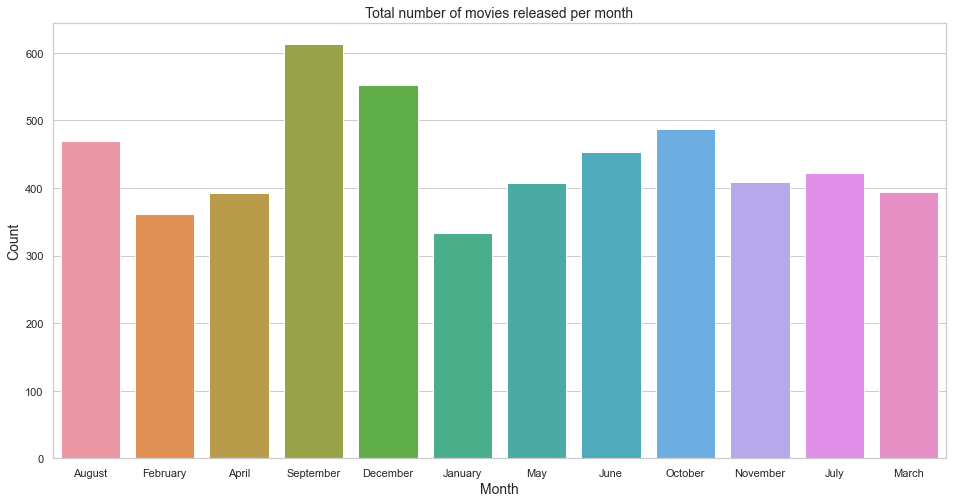

In [477]:
import datetime
months = []
for i in ourMaindf.release_date:
    x = datetime.datetime.strptime(str(i), '%Y-%m-%d').strftime('%B')
    months.append(x)

ourMaindf['month'] = months

plt.figure(figsize=(16,8))
plt.title("Movies Released in a Month")
ax = sns.countplot(x='month', data=ourMaindf, order=list(set(ourMaindf.month)))
ax.set_title('Total number of movies released per month', fontsize=14)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

#### *It can be observed from above bar graph that maximum movies are released in the month of September, while the least number of movies are released in the month of January. Hence it can be said that September is the favourite month among movie producers to release there movies*

## *Plotting Bar Graph for Gross Income of Movies by the Month*

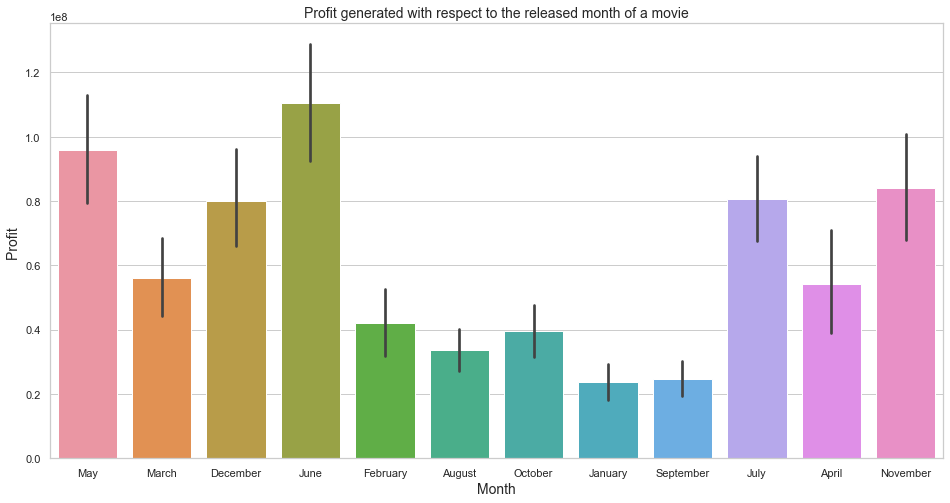

In [478]:
 #Adding Year, Month and Day column for further analysis
ourMaindf[['Year','Month','Day']] = ourMaindf.release_date.str.split("-",expand=True,)
plt.figure(figsize=(16,8))
plt.title("Gross Income of Movies by the Month")
ax = sns.barplot(x='month', y='profit', data=ourMaindf)
ax.set_title('Profit generated with respect to the released month of a movie', fontsize=14)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Profit ',fontsize=14)
plt.show()

#### *After observing above bar graph it can be said that movies released in the month of May, June earned maximum profits, while the least profit is earned in the month of January. The main reason behind this statistics is may be the fact that most of the kids have vacations during this period of time and therefore, most of the families are more likely to spend their free time watching movies with their kids*

## *Number of Movies Released on a Particular Day*

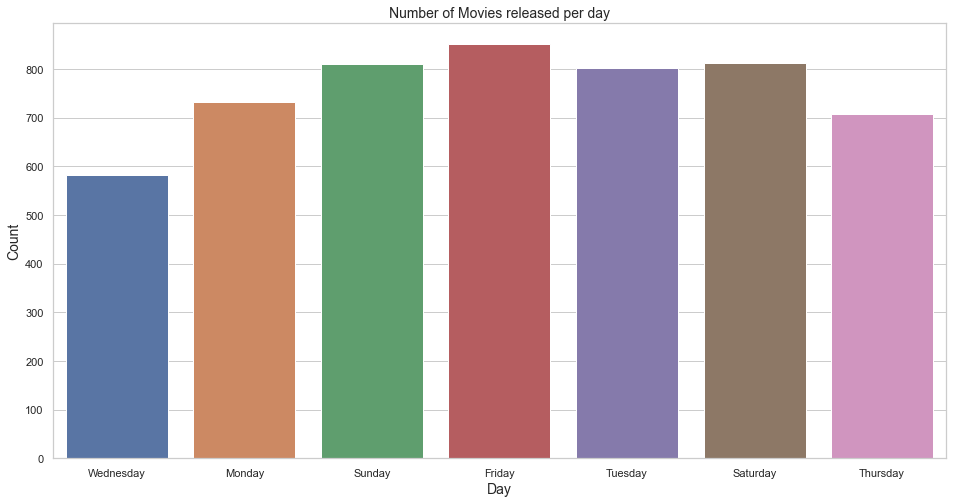

In [479]:
import datetime
days = []
for i in ourMaindf.release_date:
    x = datetime.datetime.strptime(str(i), '%Y-%M-%d').strftime('%A')
    days.append(x)

ourMaindf['day'] = days
plt.figure(figsize=(16,8))
plt.title("Number of Movies released on a particular day.")
ax  = sns.countplot(x='day', data=ourMaindf, order=list(set(ourMaindf.day)))
ax.set_title('Number of Movies released per day', fontsize=14)
ax.set_xlabel('Day', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

#### *It can be observed from above bar graph that Friday is the most popular day for the movie releases. Friday is the beginning of weekend and most of the people enjoy watching movies during their weedend holiday, this may be the main reason behind this statistics*

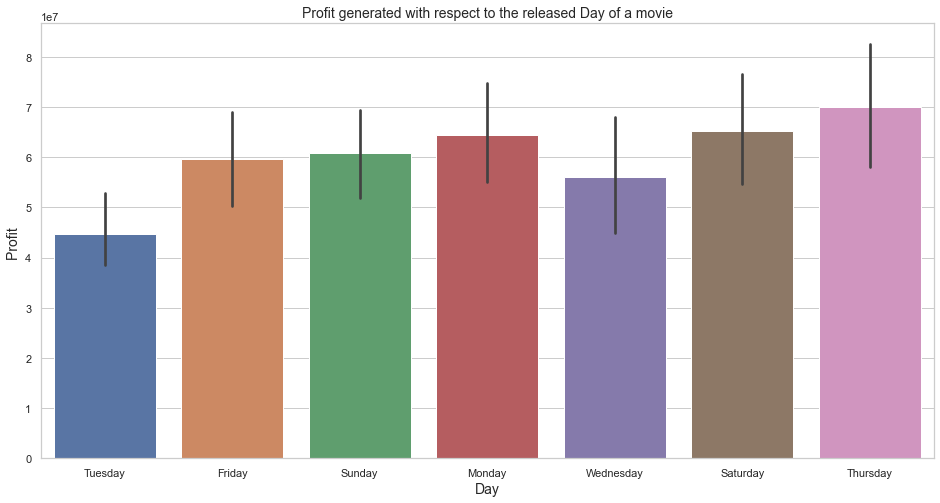

In [480]:
plt.figure(figsize=(16,8))
plt.title("Gross Income of Movies by the Month")
ax = sns.barplot(x='day', y='profit', data=ourMaindf)
ax.set_title('Profit generated with respect to the released Day of a movie', fontsize=14)
ax.set_xlabel('Day', fontsize=14)
ax.set_ylabel('Profit ',fontsize=14)
plt.show()

#### *Although most of the movies is released on a Friday, we see that profits gathered on movies which release on Thursday is the highest. This can be because highly anticipated movies will have an early release at the box office because of the demand of number of people waiting to watch the movie*

# Observing 2nd feature - If the number of people voting for a movie increases the rating of the movie.

## *Observing Correlation between Vote_count and Vote_average*

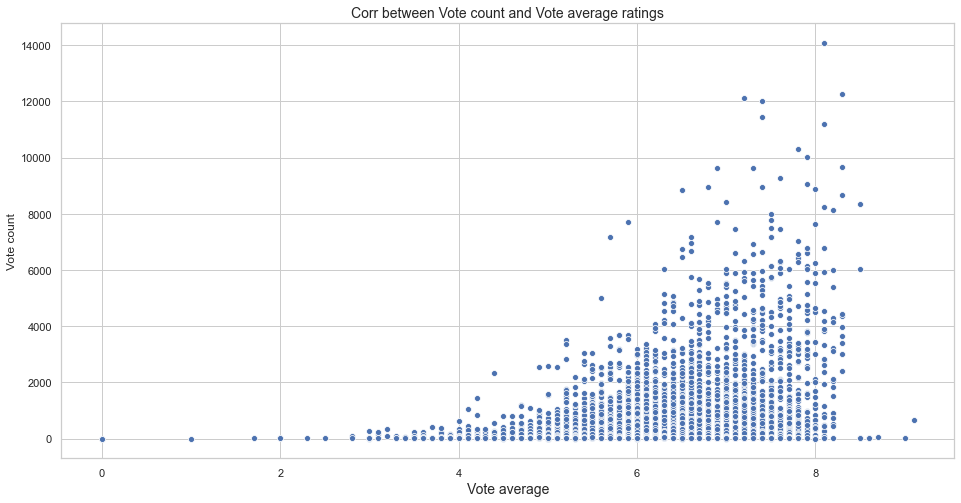

In [481]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x= 'vote_average', y='vote_count', data= ourMaindf)
ax.set_title('Corr between Vote count and Vote average ratings', fontsize=14)
ax.set_xlabel('Vote average', fontsize=14)
ax.set_ylabel('Vote count')
plt.show()

#### *There is a very small correlation between Vote Count and Vote Average. More number of votes on a particular movie does not necessarily implicate the movie to be good.*

# Observing 3rd feature - To evaluate the affect of runtime of a movie on ratings and profit

## *Evaluating Relation between Runtime and Profit*

In [482]:
runtime_plot = ourMaindf[['title', 'runtime', 'profit']].sort_values('profit', ascending=False)
runtime_plot.head()

,title,runtime,profit
748,Avatar,162.0,2.550965e+09
977,Star Wars: The Force Awakens,136.0,1.823224e+09
336,Titanic,194.0,1.645034e+09
974,Jurassic World,124.0,1.363529e+09
4481,Furious 7,137.0,1.316249e+09


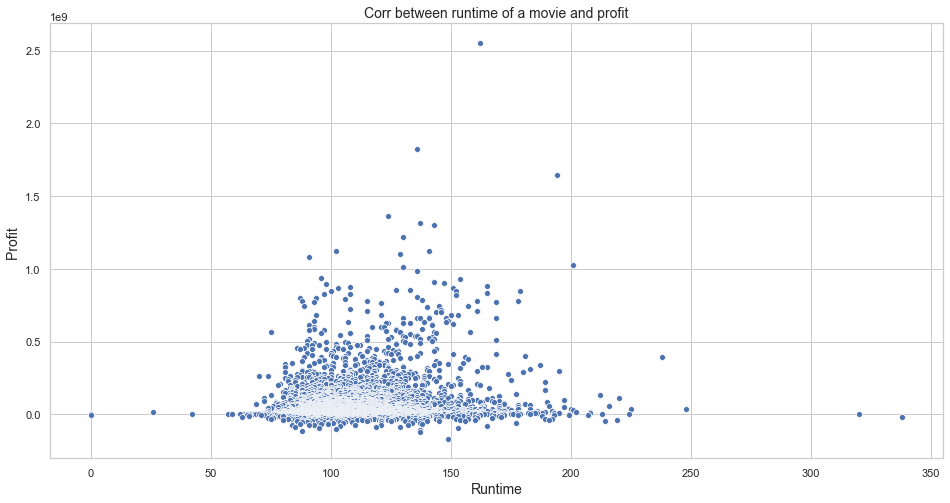

In [483]:
plt.figure(figsize=(16,8))
ax= sns.scatterplot(x= 'runtime', y='profit', data= runtime_plot)
ax.set_title('Corr between runtime of a movie and profit', fontsize=14)
ax.set_xlabel('Runtime', fontsize=14)
ax.set_ylabel('Profit ',fontsize=14)
plt.show()

#### *It can be observed from above scatter plot that there is very small correlation between profit and runtime. This means that the length of the movie can't guarantee on the profit it makes*

## *Getting Longest runtime Movies and exploring their ratings*

In [484]:
# Sorting movies on the basis of runtime
runtime_1 = ourMaindf[ourMaindf['runtime'] > 0][['runtime', 'title', 'Year', 'average_ratings', 'profit']].sort_values('runtime', ascending=False)
runtime_1.head(10)

,runtime,title,Year,average_ratings,profit
6359,338.0,Carlos,2010,3,-17128721.0
4366,320.0,Gangs of Wasseypur,2012,3,2700000.0
4918,248.0,Cleopatra,1963,3,39885000.0
888,238.0,Gone with the Wind,1939,3,396176459.0
2160,225.0,Woodstock,1970,3,33905110.0
4358,224.0,Lagaan: Once Upon a Time in India,2001,3,2900000.0
2837,220.0,The Ten Commandments,1956,3,109700000.0
6371,219.0,Heaven's Gate,1980,2,-40515669.0
116,216.0,Lawrence of Arabia,1962,4,54995385.0
1842,214.0,Gods and Generals,2003,2,-43076064.0


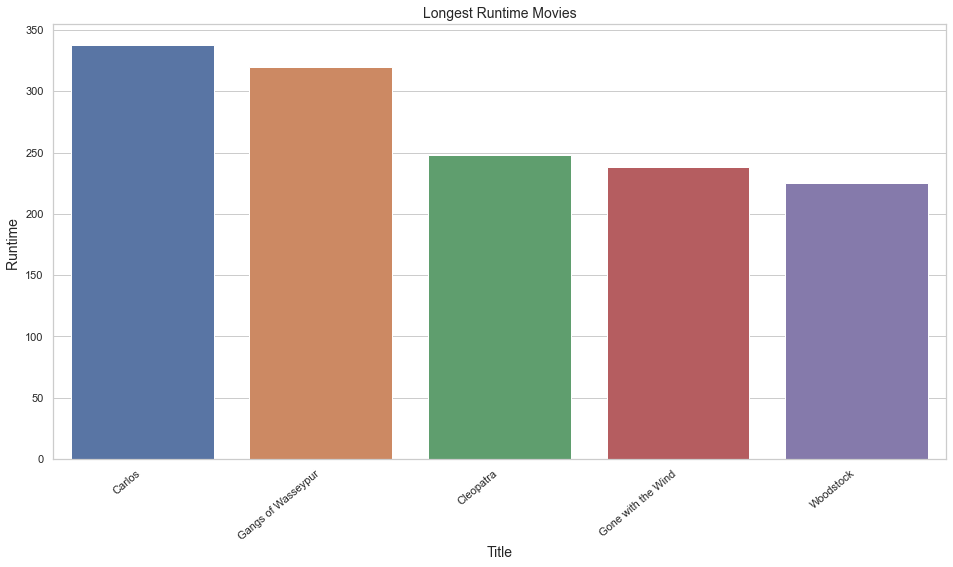

In [485]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="title", y="runtime", data=runtime_1[0:5])
ax.set_title('Longest Runtime Movies', fontsize=14)
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Runtime ',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### *It can be observed from above bar plot that Carlos movie had the highest runtime which was about 338 minutes* 

## *Exploring Ratings of the longest runtime movies*

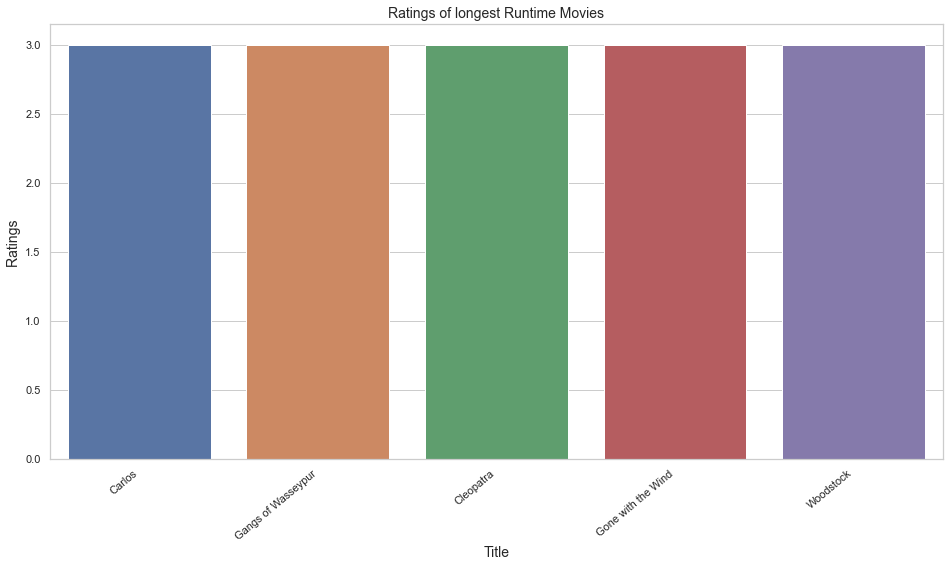

In [486]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="title", y="average_ratings", data=runtime_1[0:5])
ax.set_title('Ratings of longest Runtime Movies', fontsize=14)
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Ratings ',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### *It can be observed from the above bar plot that ratings of longest run movies are around average* 

## *Exploring profit of the longest runtime movies*

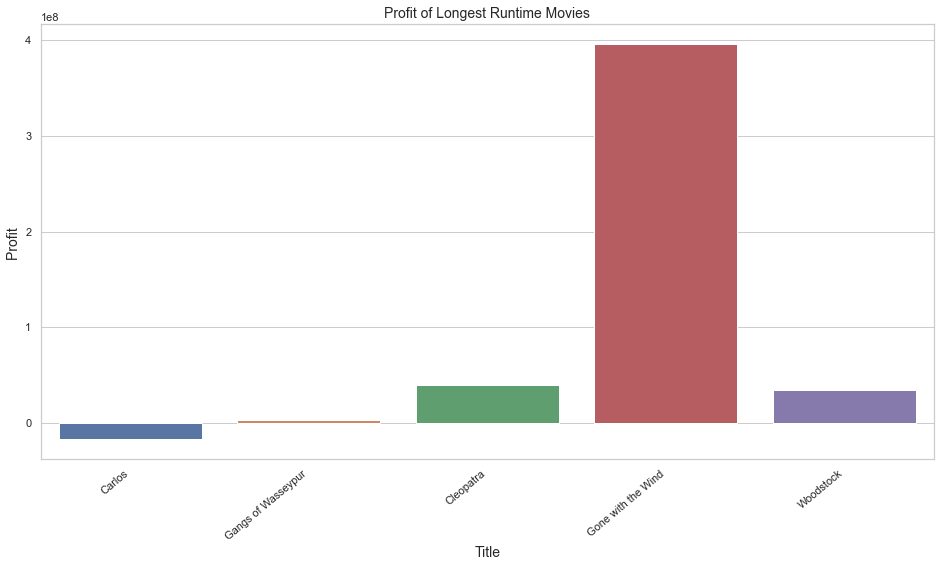

In [487]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="title", y="profit", data=runtime_1[0:5])
ax.set_title('Profit of Longest Runtime Movies', fontsize=14)
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Profit ',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### *It can be observed from above bar plot that movies with long run times do not generate more profit, this matches our conclusion from the scatter plot we generated earlier* 

# Observing 4th feature - To analyze the affect of budget on the ratings and the profit of a movie

## *Exploring ratings and profit made according to Genres*

In [488]:
exp_movie = ourMaindf[ourMaindf['budget'].notnull()][['title', 'budget', 'revenue', 'profit', 'Year', 'average_ratings']].sort_values('budget', ascending=False)
exp_movie.head()

,title,budget,revenue,profit,Year,average_ratings
1995,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,6.657138e+08,2011,3
414,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,6.610000e+08,2007,3
843,Avengers: Age of Ultron,280000000.0,1.405404e+09,1.125404e+09,2015,3
932,Superman Returns,270000000.0,3.910812e+08,1.210812e+08,2006,3
1456,Transformers: The Last Knight,260000000.0,6.049421e+08,3.449421e+08,2017,1


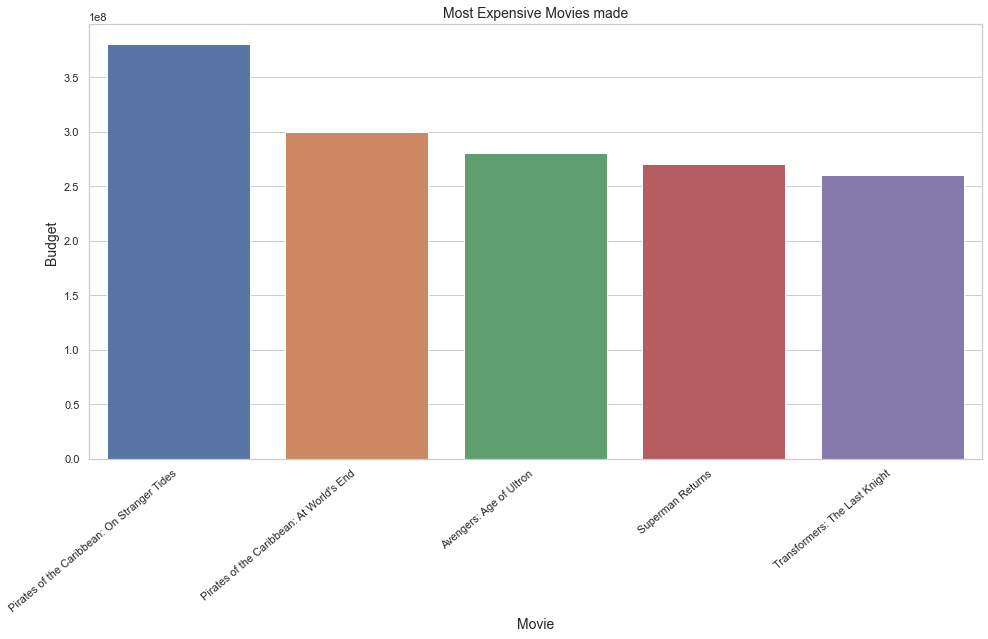

In [489]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="title", y="budget", data=exp_movie.iloc[0:5])

ax.set_title('Most Expensive Movies made', fontsize=14)
ax.set_xlabel('Movie', fontsize=14)
ax.set_ylabel('Budget ',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### *It can be observed from above bar graph that among Top 5 highest budget movies, the first and second rank is hold by Pirates of the Carribean series*

## *Exploring the profit made by the above big budget movies*

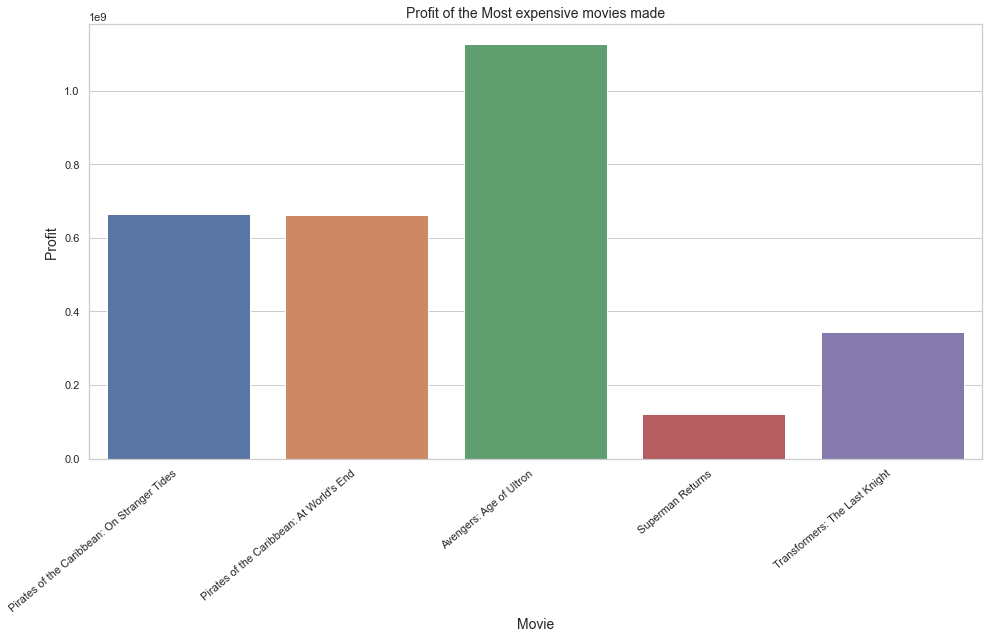

In [490]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="title", y="profit", data=exp_movie.iloc[0:5])
ax.set_title('Profit of the Most expensive movies made', fontsize=14)
ax.set_xlabel('Movie', fontsize=14)
ax.set_ylabel('Profit ',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### *We see that big budget movies rarely take a loss. This might be because big budget movies are more graphically attractive and use more innovative and 'state-of-the-art' technologies to captivate the audience and draw them to the theatres*

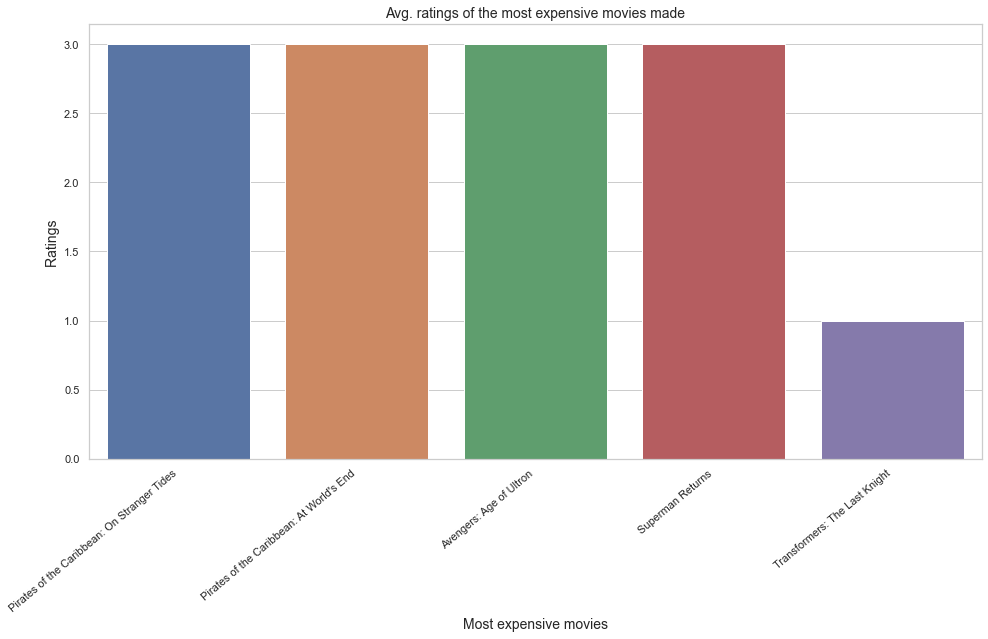

In [491]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="title", y="average_ratings", data=exp_movie.iloc[0:5])
ax.set_title('Avg. ratings of the most expensive movies made', fontsize=14)
ax.set_xlabel('Most expensive movies', fontsize=14)
ax.set_ylabel('Ratings ',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### *We see that although high budget movies score high in ratings, it is not necessary the case as seen in Transformers: The Last knight, this shows that we can't always bank on huge budgets to please the audience* 

# Observing 5th feature - The affect of genres on profit and ratings

## *Exploring ratings and profit made according to Genres*

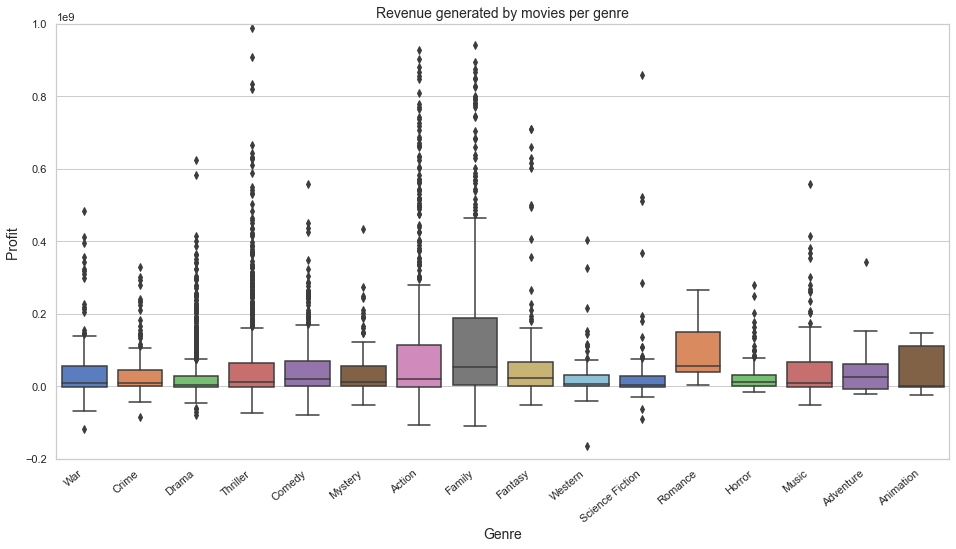

In [492]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16, 8))
ax = sns.boxplot(x='genres', y='profit', data=ourMaindf, palette="muted", ax =ax)
ax.set_ylim([-2e8, 10e8])
ax.set_title('Revenue generated by movies per genre', fontsize=14)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Profit ',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.show()
plt.show()

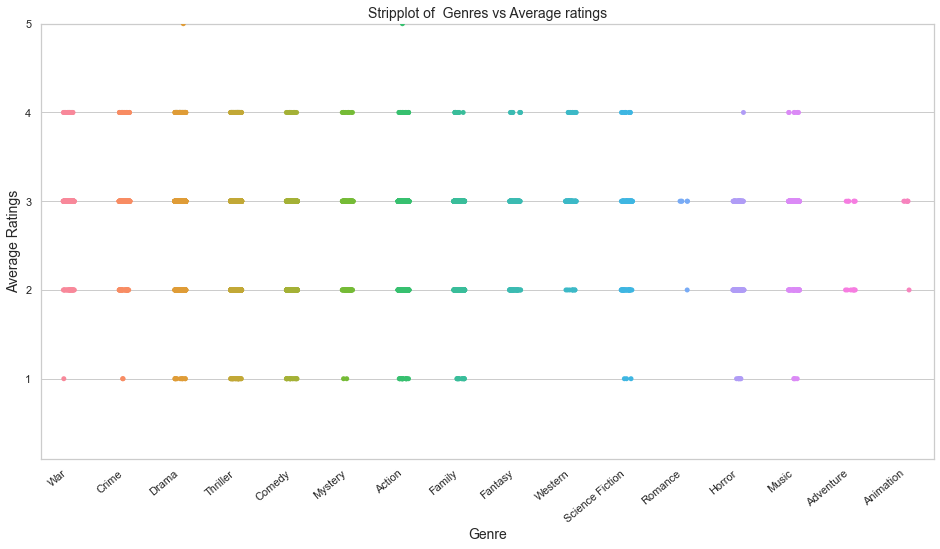

In [493]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.ylim(0.1, 5)

ax = sns.stripplot(x='genres', y = 'average_ratings', data=ourMaindf, orient='v')
ax.set_title('Stripplot of  Genres vs Average ratings', fontsize=14)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average Ratings',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


#### *From the above two plots we can see, Family are the safest bet for moviemakers to make more profit*

# Observing 6th feature - The affect of ratings on profit of a movie

# Exploring the relationship between ratings and profit earned

## *Plotting Bar Graph of Top 10 Movies according to Average Ratings*

In [494]:
ourMaindf_vote_avg = ourMaindf[['title', 'average_ratings', 'release_date']].sort_values('average_ratings', ascending=False)

In [495]:
ourMaindf_vote_avg.head()

,title,average_ratings,release_date
10363,Voracious,5,2012-09-05
10378,Veeram,5,2014-01-10
0,Braveheart,4,1995-05-24
553,Ran,4,1985-06-01
551,GoodFellas,4,1990-09-12


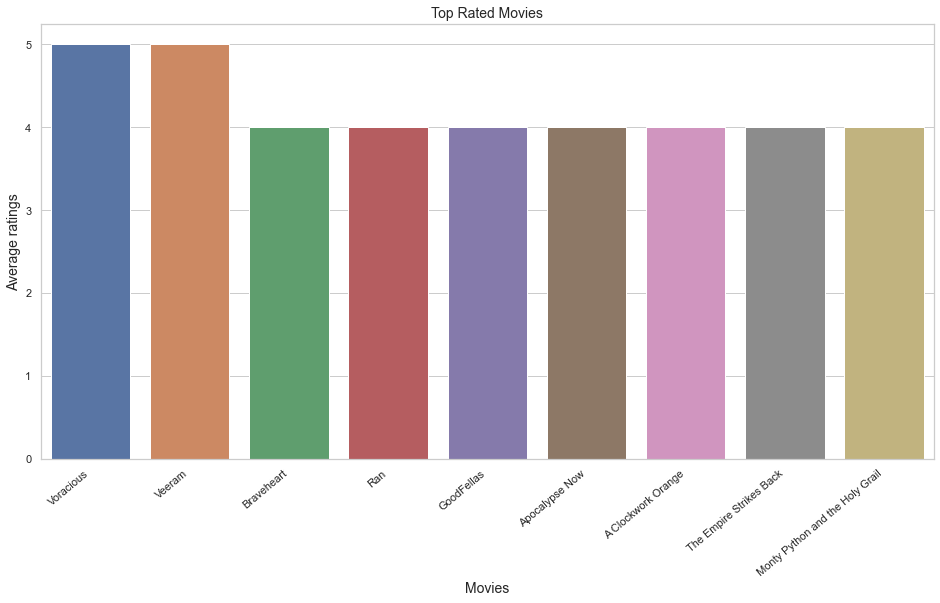

In [496]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="title", y= "average_ratings", data= ourMaindf_vote_avg.iloc[0:9])
ax.set_title('Top Rated Movies', fontsize=14)
ax.set_xlabel('Movies', fontsize=14)
ax.set_ylabel('Average ratings', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

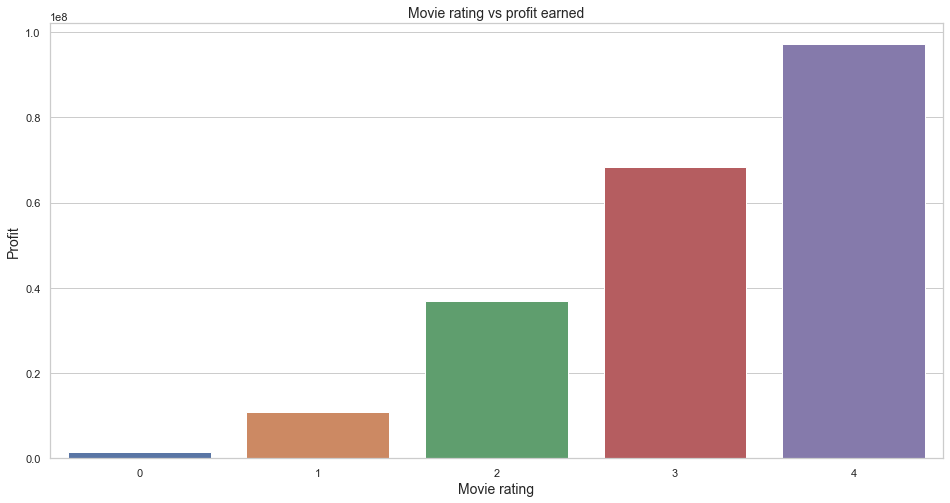

In [497]:
ourMaindf_profit = ourMaindf[['title', 'profit', 'average_ratings']].sort_values('profit', ascending=False)

listProfit = []
for i in list(set(ourMaindf_profit.average_ratings))[:5]:
    x = ourMaindf_profit[ourMaindf_profit.average_ratings == i].profit.mean()
    listProfit.append(x)

    
profitDF = pd.DataFrame(listProfit)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
ax = sns.barplot( x=profitDF.index,y=profitDF[0], data=profitDF)
ax.set_title('Movie rating vs profit earned', fontsize=14)
ax.set_xlabel('Movie rating', fontsize=14)
ax.set_ylabel('Profit',fontsize=14)
plt.show()

#### *From the above plot it can be concluded that there is a direct relationship between movie rating and profit earned by those movies. As it can be observed that movies that recieved high ratings earn greater profit. Since there are only two data points with movie rating 5, we can ignore the outlier*

# *Exploring Correlation plot between average ratings, runtime, revenue, budget, profit and number of votes*

In [498]:
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 30)

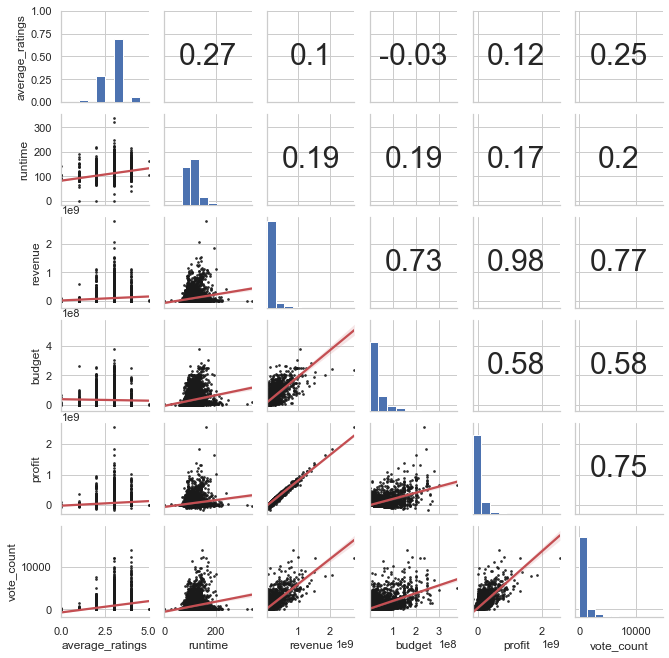

In [499]:
scatterdata = ourMaindf[['average_ratings', 'runtime', 'revenue', 'budget', 'profit', 'vote_count']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)


#### *The above plot shows a correlation graph between average ratings, runtime, revenue, profit, budget and number of votes of a movie. We can see the best correlation is between revenue and profit(0.98). We can see negative correlation between - average ratings and budget. For other parameters we can see positive correlation.*

## *From all the above plots and explanations, we can say movie ratings is directly proportional to the success of a movie. There are some key features which influence the success of a movie as explored above. We will use these features with some additional curated features to build a Model to predict the rating of the movie, i.e. the sucess of a movie*

# Other additional plots giving an overview of our dataset

## *Evaluating Number of Movies Released by Year*

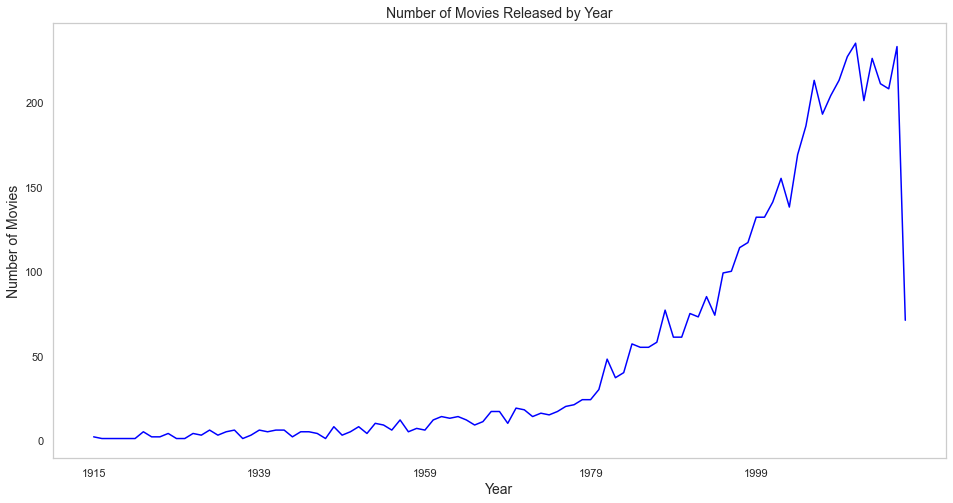

In [500]:
plt.figure(figsize=(16,8))
year_plot = ourMaindf.groupby('Year')['title'].count()
year_plot.plot(color='blue', figsize=(16,8))
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Movies",fontsize=14)
plt.title("Number of Movies Released by Year",fontsize=14)
plt.grid()
plt.show()

#### *We had a dataset of movies released since 1915 but it can be said that a sudden rise can be observed in the number of movies at the starting of 1990s*

## *Exploring the movies with different languages in our dataset*

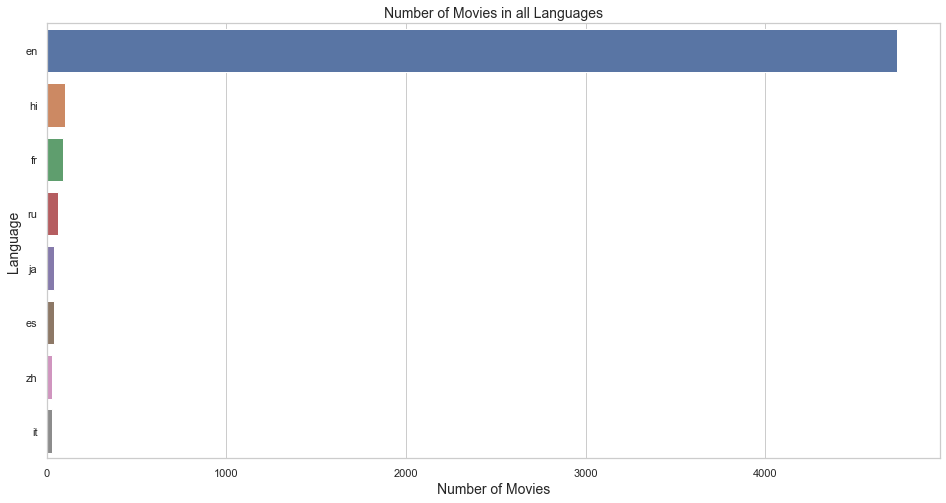

In [501]:
ourMaindf['original_language'].drop_duplicates()
language = pd.DataFrame(ourMaindf['original_language'].value_counts())
language['language'] = language.index
language.columns = ['num_movies', 'language']


plt.figure(figsize=(16,8))
ax = sns.barplot(x="num_movies", y="language", data=language.iloc[0:8])
ax.set_title('Number of Movies in all Languages', fontsize=14)
ax.set_xlabel('Number of Movies', fontsize=14)
ax.set_ylabel('Language', fontsize=14)
plt.show()

#### *From the above plot we can deduce majority movies in our dataset are of the english langauage*

## *Excluding Movies that Released in English Language*

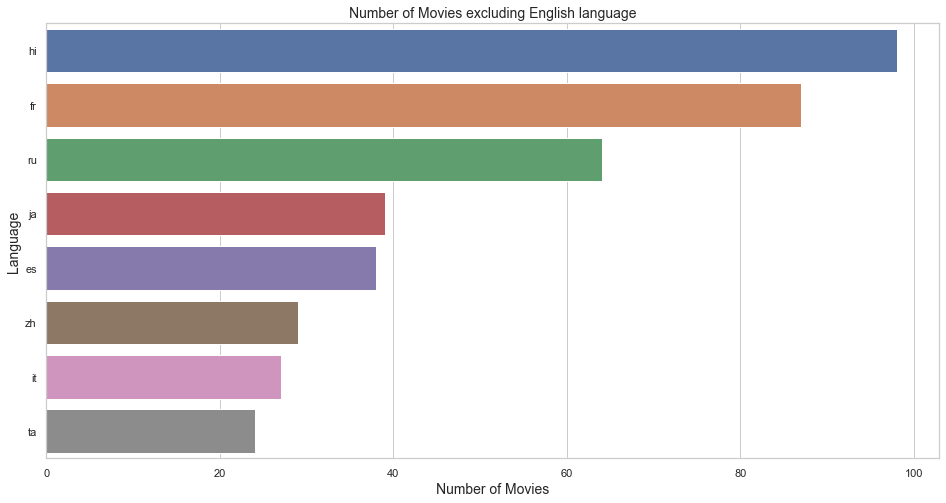

In [502]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="num_movies", y="language", data=language.iloc[1:9])
ax.set_title('Number of Movies excluding English language', fontsize=14)
ax.set_xlabel('Number of Movies', fontsize=14)
ax.set_ylabel('Language',fontsize=14)
plt.show()

#### *From the above plot it can be concluded that after excluding English movies, movies released in Hindi language are maximum*

## *Plotting Bar Graph of Top 9 Highest Earning Movies*

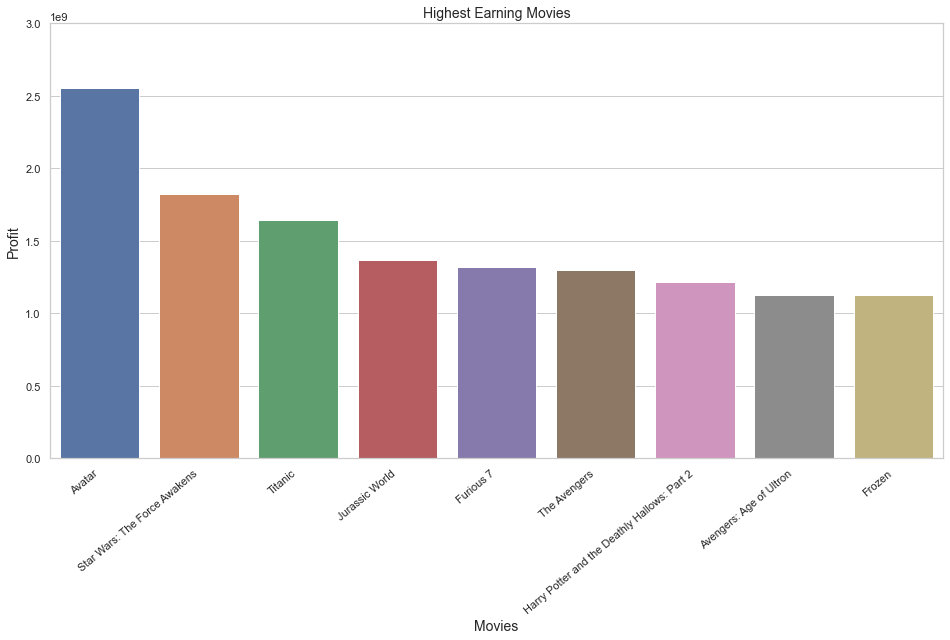

In [503]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="title", y= "profit", data= ourMaindf_profit.iloc[0:9])
ax.set_title('Highest Earning Movies', fontsize=14)
ax.set_xlabel('Movies', fontsize=14)
ax.set_ylabel('Profit', fontsize=14)
ax.set_ylim([0, 3*1e9])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### *It can be observed from above bar graph that Avatar is the highest grossing movie of all time earning highest profits*

## *Top 10 Director that gave Highest Profit Earning Movies*

In [504]:
ourMaindf_director = ourMaindf[['title', 'director', 'revenue', 'profit']].sort_values('profit', ascending=False)
ourMaindf_director.head()

,title,director,revenue,profit
748,Avatar,James Cameron,2.787965e+09,2.550965e+09
977,Star Wars: The Force Awakens,J.J. Abrams,2.068224e+09,1.823224e+09
336,Titanic,James Cameron,1.845034e+09,1.645034e+09
974,Jurassic World,Colin Trevorrow,1.513529e+09,1.363529e+09
4481,Furious 7,James Wan,1.506249e+09,1.316249e+09


#### *Let's explore the profit made by the movie directed by Top 10 Directors*

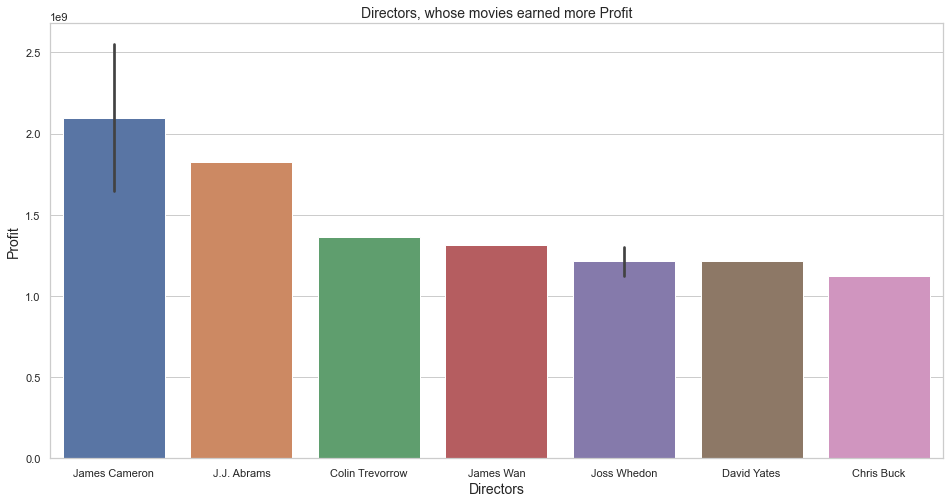

In [505]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="director", y="profit", data=ourMaindf_director.iloc[0:9])
ax.set_title('Directors, whose movies earned more Profit', fontsize=14)
ax.set_xlabel('Directors', fontsize=14)
ax.set_ylabel('Profit', fontsize=14)
plt.show()

#### *From the above plot it can be observed that James Cameron ranks on the top when it comes to Top 10 Directors that gave HIghest Profit Earning Movies*

## *Top 5 Movies that suffered Loss*

In [506]:
ourMaindf_loss = ourMaindf[['title', 'revenue', 'profit']].sort_values('profit')
ourMaindf_loss.head()

,title,revenue,profit
3375,The Lone Ranger,89289910.0,-165710090.0
6139,The Alamo,25819961.0,-119180039.0
6336,Mars Needs Moms,38992758.0,-111007242.0
5337,Valerian and the City of a Thousand Planets,90024292.0,-107447384.0
995,The 13th Warrior,61698899.0,-98301101.0


#### *Let's explore the loss suffered by the above given movies*

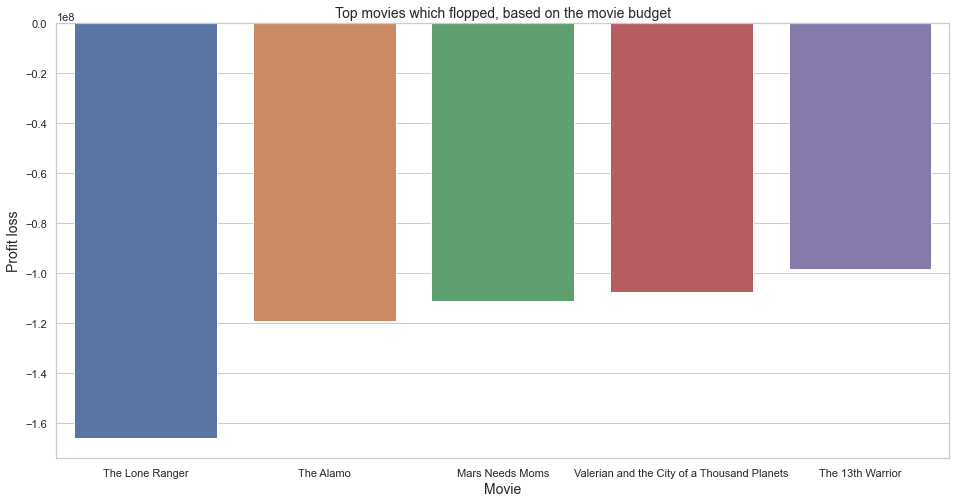

In [507]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="title", y="profit", data=ourMaindf_loss.iloc[0:5])
ax.set_title('Top movies which flopped, based on the movie budget', fontsize=14)
ax.set_xlabel('Movie', fontsize=14)
ax.set_ylabel('Profit loss',fontsize=14)
plt.show()

#### *Above plot gives Top 5 movies that suffered loss. It can be said that the makers of The Lone Ranger suffered highest loss*

## *Top 10 actors that gave Highest Earning Movies*

In [508]:
Star = ourMaindf[['title', 'actor', 'revenue', 'profit']].sort_values('profit', ascending=False)
Star.head()

,title,actor,revenue,profit
748,Avatar,Sam Worthington,2.787965e+09,2.550965e+09
977,Star Wars: The Force Awakens,Daisy Ridley,2.068224e+09,1.823224e+09
336,Titanic,Kate Winslet,1.845034e+09,1.645034e+09
974,Jurassic World,Chris Pratt,1.513529e+09,1.363529e+09
4481,Furious 7,Vin Diesel,1.506249e+09,1.316249e+09


#### *Let's explore the profit made by the movies that had Top 10 actors*

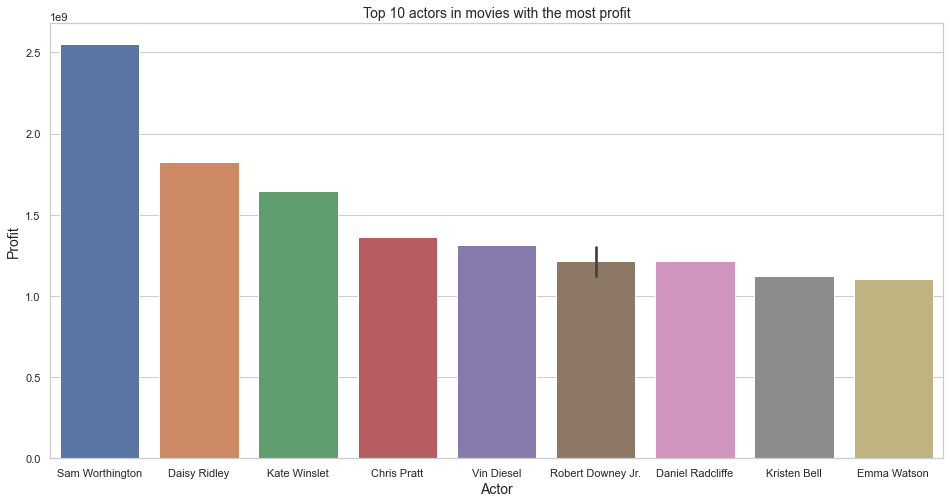

In [509]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="actor", y="profit", data=Star.iloc[0:10])
ax.set_title('Top 10 actors in movies with the most profit', fontsize=14)
ax.set_xlabel('Actor', fontsize=14)
ax.set_ylabel('Profit',fontsize=14)
plt.show()

#### *After observing above bar graph it can be said that Sam Worthington ranks at the top when it comes to Top 10 actors that gave Highest Earning Movies*

## *Relation between number of production companies and genre*

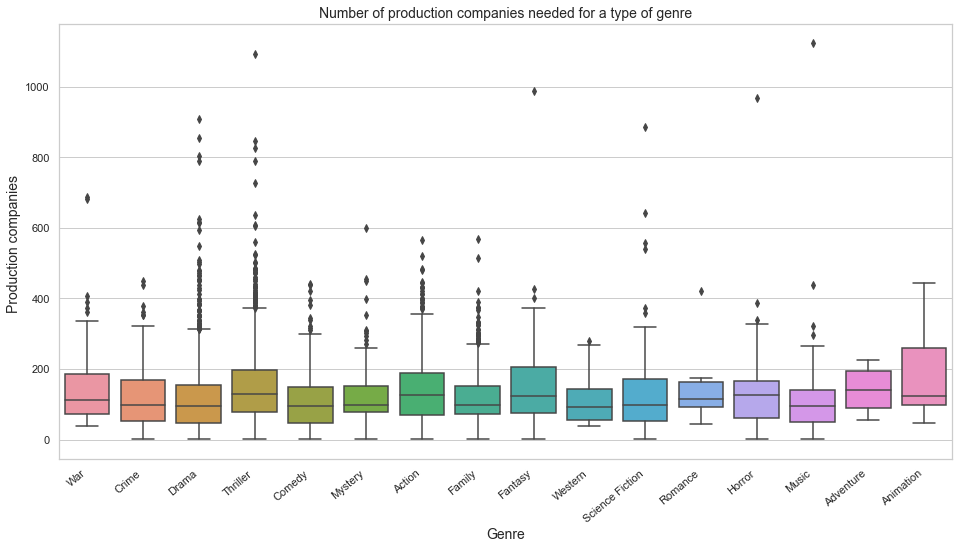

In [510]:

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16, 8))
ourMaindf['production_companies'] = ourMaindf['production_companies'].apply(lambda x: len(x))
ax = sns.boxplot(x='genres', y='production_companies', data=ourMaindf, ax =ax)
ax.set_title('Number of production companies needed for a type of genre', fontsize=14)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Production companies ',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.show()
plt.show()

#### *From the above Barplot we can see, Production companies produce Animation movies more than any other genre of movies. Mystery movies are less preffered by production companies.*

## Label Encoding

In [511]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(list(ourMaindf['genres'].values))

# Adding genre no column in the data set using label encoder which transforms the non numeric labels to numeric labels 

ourMaindf['genre_no'] = le.transform(list(ourMaindf['genres']))

In [512]:
le = preprocessing.LabelEncoder()
le.fit(list(ourMaindf['day'].values))

# Adding day no column in the data set using label encoder which transforms the non numeric labels to numeric labels 

ourMaindf['day_no'] = le.transform(list(ourMaindf['day']))

In [513]:
le = preprocessing.LabelEncoder()
le.fit(list(ourMaindf['month'].values))

# Adding month no column in the data set using label encoder which transforms the non numeric labels to numeric labels 
ourMaindf['month_no'] = le.transform(list(ourMaindf['month']))

In [514]:
le = preprocessing.LabelEncoder()
le.fit(list(ourMaindf['original_language'].values))

# Adding language no column in the data set using label encoder which transforms the non numeric labels to numeric labels 
ourMaindf['lang_no'] = le.transform(list(ourMaindf['original_language']))

# *Feature set Conversion*

In [515]:
#Adding our feature sets


ourMaindf['budget'] = ourMaindf['budget'].astype(int)
ourMaindf['belongs_to_collection'] = ourMaindf['belongs_to_collection'].apply(lambda x: 0 if x == np.nan else 1)
ourMaindf['production_countries'] = ourMaindf['production_countries'].apply(lambda x: len(x))
ourMaindf['homepage'] = ourMaindf['homepage'].apply(lambda x: 0 if x == np.nan else 1)

ourMaindf['title_len'] = ourMaindf['title'].apply(lambda x: len(x))

# *Machine Learning Model, Logistic Regression*

In [516]:
# Splitting the data in 20% Test and 80% Train set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
train, test = train_test_split(ourMaindf, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(4237, 33)
(1060, 33)


## *Adding our curated features*

In [517]:

X_train = train[['belongs_to_collection', 'budget',  'production_companies',
       'production_countries', 'runtime','vote_count','crew_size','cast_size','homepage',
       'genre_no', 'day_no', 'month_no', 'lang_no', 'title_len']]
y_train = train['average_ratings']
X_test = test[['belongs_to_collection', 'budget',  'production_companies',
       'production_countries', 'runtime','vote_count','crew_size','cast_size','homepage',
       'genre_no', 'day_no', 'month_no', 'lang_no','title_len']]
y_test = test['average_ratings']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4237, 14)
(4237,)
(1060, 14)
(1060,)


In [518]:
len(X_train.columns)

14

In [519]:
X_train.columns

Index(['belongs_to_collection', 'budget', 'production_companies',
       'production_countries', 'runtime', 'vote_count', 'crew_size',
       'cast_size', 'homepage', 'genre_no', 'day_no', 'month_no', 'lang_no',
       'title_len'],
      dtype='object')

## *Checking our model performance by selecting the best features. Using RFE to select best features*

### *We used Logistic Regression model to predict the rating of the movie and got RMSE score of 0.6457* 

In [520]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
estimator = LogisticRegression()
selector = RFE(estimator,14) 

selector = selector.fit(X_train, y_train)
supp = selector.support_
feature_columns = X_train.columns
print("Selected features:", feature_columns[supp])

# test the model
predicted = selector.predict(X_test)
predicted = np.around(predicted)
print('Testing scores:')
print('MAE:', mean_absolute_error(y_test, predicted))
print('R2 square:', r2_score(y_test, predicted))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted)))
print('Accuracy',accuracy_score(y_test, predicted))

Selected features: Index(['belongs_to_collection', 'budget', 'production_companies',
       'production_countries', 'runtime', 'vote_count', 'crew_size',
       'cast_size', 'homepage', 'genre_no', 'day_no', 'month_no', 'lang_no',
       'title_len'],
      dtype='object')
Testing scores:
MAE: 0.38301886792452833
R2 square: -0.18357664878957003
RMSE: 0.6457407622842712
Accuracy 0.6330188679245283


#### *Further we used Recurssive Feature Estimation and selected 14 features and observed that  we are getting  accuracy score of 0.6330 and RMSE score of 0.6457*

## *Checking our model performance by selecting the best features and Evaluating RMSE score for each feature*

In [521]:
# Selecting all the features for RFE and asking to print the RMSE scores along with the number of features

rmse_scores = []
for i in range(1,15):
    selector = RFE(estimator,i)
    selector.fit(X_train,y_train)
    predicted = selector.predict(X_test)
    rmse_score = np.sqrt(mean_squared_error(y_test, predicted))
    print("RMSE on using ", i , "features: ", rmse_score)
    rmse_scores.append(rmse_score)

RMSE on using  1 features:  0.6609027559559641
RMSE on using  2 features:  0.6501088442976009
RMSE on using  3 features:  0.6501088442976009
RMSE on using  4 features:  0.6450098726756488
RMSE on using  5 features:  0.6457407622842712
RMSE on using  6 features:  0.6450098726756488
RMSE on using  7 features:  0.6457407622842712
RMSE on using  8 features:  0.6457407622842712
RMSE on using  9 features:  0.644278153923165
RMSE on using  10 features:  0.6457407622842712
RMSE on using  11 features:  0.6457407622842712
RMSE on using  12 features:  0.644278153923165
RMSE on using  13 features:  0.6457407622842712
RMSE on using  14 features:  0.6457407622842712


No.of features with best suit the model 9


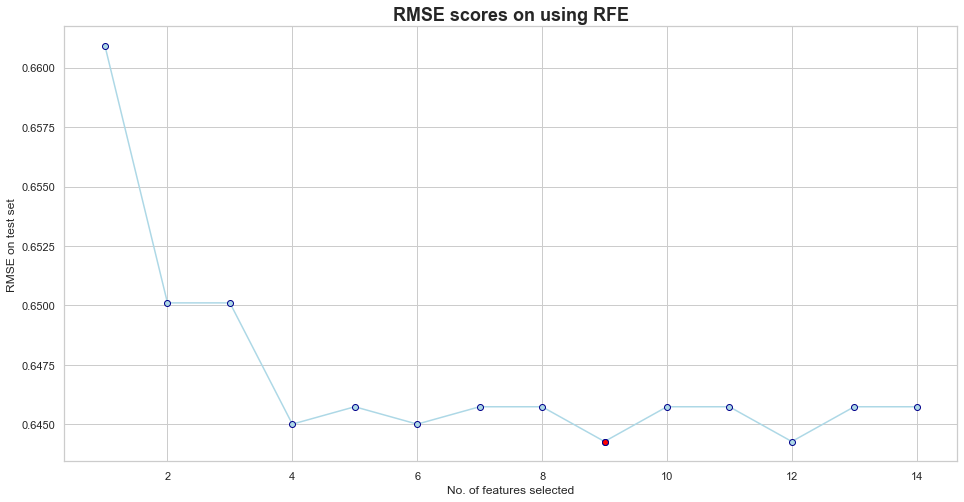

In [522]:
best = 1
for item in rmse_scores:
    if item < rmse_scores[best -1]:
        best = rmse_scores.index(item) + 1
print('No.of features with best suit the model', best)

plt.figure(figsize=(16,8))
plt.xlabel('No. of features selected')
plt.ylabel('RMSE on test set')
plt.title('RMSE scores on using RFE', fontsize=18, fontweight='bold')
plt.plot(range(1,15), rmse_scores,marker='o', color='lightblue',markeredgewidth=1, markeredgecolor='DarkBlue')
plt.plot(best, rmse_scores[best -1],marker='o', color='red',markeredgewidth=1, markeredgecolor='DarkBlue')
plt.show()

#### *It can be seen on Y - axis we have Number of features and on the X - axis we have RMSE score. On selecting the number of features we can come to know the RMSE score and the accuracy of the model. Figure shows, with 9 features and with 12 features, we get the lowest RMSE score and on selecting only one feature we get highest RMSE score.* 


## *Building Models with our best 9 features*


### *Using LogisticRegressor*

In [523]:
estimator = LogisticRegression()
selector = RFE(estimator,9) 

selector = selector.fit(X_train, y_train)
supp = selector.support_
feature_columns = X_train.columns
print("Selected features:", feature_columns[supp])

# test the model
predicted = selector.predict(X_test)
predicted = np.around(predicted)
print('Testing scores:')
print('MAE:', mean_absolute_error(y_test, predicted))
print('R2 square:', r2_score(y_test, predicted))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted)))
print('Accuracy',accuracy_score(y_test, predicted))

# Getting Accuracy score, Precision score, Recall score and f1 score 

lr_acc = accuracy_score(y_test, predicted)
lr_precision = precision_score(y_test, predicted, average = 'weighted')
lr_recall = recall_score(y_test, predicted, average = 'weighted')
lr_f1 = f1_score(y_test, predicted, average = 'weighted')
print()
print('Logistic Regression Accuracy score:', lr_acc)
print('Logistic Regression Precision score:', lr_precision)
print('Logistic Regression Recall score:', lr_recall)
print('Logistic Regression F1 score:', lr_f1)

Selected features: Index(['budget', 'production_companies', 'runtime', 'vote_count', 'crew_size',
       'cast_size', 'genre_no', 'lang_no', 'title_len'],
      dtype='object')
Testing scores:
MAE: 0.38113207547169814
R2 square: -0.17822109834255828
RMSE: 0.644278153923165
Accuracy 0.6349056603773585

Logistic Regression Accuracy score: 0.6349056603773585
Logistic Regression Precision score: 0.5610481068521058
Logistic Regression Recall score: 0.6349056603773585
Logistic Regression F1 score: 0.5864648871720521


#### *We used Recurssive Feature Estimation and selected 9 features and observed that  we are getting  accuracy score of 0.6490 and RMSE score of 0.6508*

### *Using DecisionTree Classifier*

In [524]:
# MAPE function
# Source: https://stackoverflow.com/questions/47648133/mape-calculation-in-python

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [525]:
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42, max_depth=4)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
pred = np.around(pred)
print('Testing scores:')
print('MAE:', mean_absolute_error(y_test, pred))
print('R2 square:', r2_score(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('Accuracy',accuracy_score(y_test, pred))

# Getting Accuracy score, Precision score, Recall score and f1 score 

dtc_acc = accuracy_score(y_test, pred)
dtc_precision = precision_score(y_test, pred, average = 'weighted')
dtc_recall = recall_score(y_test, pred, average = 'weighted')
dtc_f1 = f1_score(y_test, pred, average = 'weighted')
print()
print('Decision Tree Accuracy score:', dtc_acc)
print('Decision Tree Precision score:', dtc_precision)
print('Decision Tree Recall score:', dtc_recall)
print('Decision Tree F1 score:', dtc_f1)

Testing scores:
MAE: 0.34150943396226413
R2 square: -0.08182119029634904
RMSE: 0.6173589518843136
Accuracy 0.6773584905660377

Decision Tree Accuracy score: 0.6773584905660377
Decision Tree Precision score: 0.6128452229598637
Decision Tree Recall score: 0.6773584905660377
Decision Tree F1 score: 0.6321310164680324


#### *We used Decision Tree Classifier model to predict the rating of the movie and got RMSE score of 0.6173 and the Accuracy score of 0.6773.* 


### *Using Random Forest Classifier*

In [526]:
from sklearn.ensemble import RandomForestClassifier

RanFor = RandomForestClassifier(max_depth=2, random_state=42)
RanFor.fit(X_train, y_train)

# Prediction
y_test_predicted = RanFor.predict(X_test)
y_test_predicted = np.around(y_test_predicted)

print('Testing scores:')
print('MAE:', mean_absolute_error(y_test, y_test_predicted))
print('R2 square:', r2_score(y_test, y_test_predicted))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_predicted)))
print('Accuracy',accuracy_score(y_test, y_test_predicted))

# Getting Accuracy score, Precision score, Recall score and f1 score 

rfc_acc = accuracy_score(y_test, y_test_predicted)
rfc_precision = precision_score(y_test, y_test_predicted, average = 'weighted')
rfc_recall = recall_score(y_test, y_test_predicted, average = 'weighted')
rfc_f1 = f1_score(y_test, y_test_predicted, average = 'weighted')
print()
print('Random Forest Accuracy score:', rfc_acc)
print('Random Forest Precision score:', rfc_precision)
print('Random Forest Recall score:', rfc_recall)
print('Random Forest F1 score:', rfc_f1)

Testing scores:
MAE: 0.3745283018867924
R2 square: -0.2023210753541107
RMSE: 0.6508340077626379
Accuracy 0.6490566037735849

Random Forest Accuracy score: 0.6490566037735849
Random Forest Precision score: 0.42127447490210035
Random Forest Recall score: 0.6490566037735849
Random Forest F1 score: 0.5109278528560943


#### *The accuracy score for Random Forest Classifier was 0.6490. The accuracy score generated by Random Forest Classifier didnot exceeded the accuracy score of Decision Tree Classifier* 

### *Using SVM*

In [527]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM.fit(X_train, y_train)

# Prediction
y_test_predicted1 = SVM.predict(X_test)
y_test_predicted1 = np.around(y_test_predicted1)

print('Testing scores:')
print('MAE:', mean_absolute_error(y_test, y_test_predicted1))
print('R2 square:', r2_score(y_test, y_test_predicted1))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_predicted1)))
print('Accuracy',accuracy_score(y_test, y_test_predicted1))

# Getting Accuracy score, Precision score, Recall score and f1 score 

svm_acc = accuracy_score(y_test, y_test_predicted1)
svm_precision = precision_score(y_test, y_test_predicted1, average = 'weighted')
svm_recall = recall_score(y_test, y_test_predicted1, average = 'weighted')
svm_f1 = f1_score(y_test, y_test_predicted1, average = 'weighted')
print()
print('SVM Accuracy score:', svm_acc)
print('SVM Precision score:', svm_precision)
print('SVM Recall score:', svm_recall)
print('SVM F1 score:', svm_f1)

Testing scores:
MAE: 0.32264150943396225
R2 square: -0.0443323371672677
RMSE: 0.6065678266293777
Accuracy 0.6990566037735849

SVM Accuracy score: 0.6990566037735849
SVM Precision score: 0.6882983553627283
SVM Recall score: 0.6990566037735849
SVM F1 score: 0.6416428889084614


#### *The accuracy score generated by SVM was 0.6990 which exceeded the accuracy score of Random Forest Classifier, Decision Tree Classifier, Logisitic Regression Model* 

### *Using K-Nearest Neighbours*

In [528]:
from sklearn.neighbors import KNeighborsClassifier

NN = KNeighborsClassifier(n_neighbors=3)
NN.fit(X_train, y_train)

# Predictions
y_test_predicted2 = NN.predict(X_test)
y_test_predicted2 = np.around(y_test_predicted2)

print('Testing scores:')
print('MAE:', mean_absolute_error(y_test, y_test_predicted2))
print('R2 square:', r2_score(y_test, y_test_predicted2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_predicted2)))
print('Accuracy',accuracy_score(y_test, y_test_predicted2))

# Getting Accuracy score, Precision score, Recall score and f1 score 

neigh_acc = accuracy_score(y_test, y_test_predicted2)
neigh_precision = precision_score(y_test, y_test_predicted2, average = 'weighted')
neigh_recall = recall_score(y_test, y_test_predicted2, average = 'weighted')
neigh_f1 = f1_score(y_test, y_test_predicted2, average = 'weighted')
print()
print('KNN Accuracy score:', neigh_acc)
print('KNN Precision score:', neigh_precision)
print('KNN Recall score:', neigh_recall)
print('KNN F1 score:', neigh_f1)

Testing scores:
MAE: 0.45660377358490567
R2 square: -0.5531096296333724
RMSE: 0.7397092748646287
Accuracy 0.5849056603773585

KNN Accuracy score: 0.5849056603773585
KNN Precision score: 0.549403160475438
KNN Recall score: 0.5849056603773585
KNN F1 score: 0.5640986721303274


#### *The accuracy score generated by K - nearest Neighbours Classifier was 0.5849 which is far less than the accuracy score of Random Forest Classifier, Decision Tree Classifier, Logisitic Regression Model* 

### *Using Neural Net (MLP)*

In [529]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(random_state=1, max_iter=300)
MLP.fit(X_train, y_train)

# Predictions
y_test_predicted3 = MLP.predict(X_test)
y_test_predicted3 = np.around(y_test_predicted3)

print('Testing scores:')
print('MAE:', mean_absolute_error(y_test, y_test_predicted3))
print('R2 square:', r2_score(y_test, y_test_predicted3))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_predicted3)))
print('Accuracy',accuracy_score(y_test, y_test_predicted3))

# Getting Accuracy score, Precision score, Recall score and f1 score 

mlpc_acc = accuracy_score(y_test, y_test_predicted3)
mlpc_precision = precision_score(y_test, y_test_predicted3, average = 'weighted')
mlpc_recall = recall_score(y_test, y_test_predicted3, average = 'weighted')
mlpc_f1 = f1_score(y_test, y_test_predicted3, average = 'weighted')
print()
print('MLP Accuracy score:', mlpc_acc)
print('MLP Precision score:', mlpc_precision)
print('MLP Recall score:', mlpc_recall)
print('MLP F1 score:', mlpc_f1)

Testing scores:
MAE: 0.37830188679245286
R2 square: -0.2183877266951455
RMSE: 0.6551681333969686
Accuracy 0.6462264150943396

MLP Accuracy score: 0.6462264150943396
MLP Precision score: 0.42062797879366665
MLP Recall score: 0.6462264150943396
MLP F1 score: 0.5095745255987458


#### *The accuracy score generated by MLP was 0.6462 which didnot exceeded the accuracy score of Decision Tree Classifier or Random Forest Classifier.* 

### *Using AdaBoost*

In [530]:
from sklearn.ensemble import AdaBoostClassifier

ADA = AdaBoostClassifier(n_estimators=100, random_state=0)
ADA.fit(X_train, y_train)

# Predictions
y_test_predicted4 = ADA.predict(X_test)
y_test_predicted4 = np.around(y_test_predicted4)

print('Testing scores:')
print('MAE:', mean_absolute_error(y_test, y_test_predicted4))
print('R2 square:', r2_score(y_test, y_test_predicted4))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_predicted4)))
print('Accuracy',accuracy_score(y_test, y_test_predicted4))

# Getting Accuracy score, Precision score, Recall score and f1 score 

abc_acc = accuracy_score(y_test, y_test_predicted4)
abc_precision = precision_score(y_test, y_test_predicted4, average = 'weighted')
abc_recall = recall_score(y_test, y_test_predicted4, average = 'weighted')
abc_f1 = f1_score(y_test, y_test_predicted4, average = 'weighted')
print()
print('AdaBoost Accuracy score:', abc_acc)
print('AdaBoost Precision score:', abc_precision)
print('AdaBoost Recall score:', abc_recall)
print('AdaBoost F1 score:', abc_f1)

Testing scores:
MAE: 1.0726415094339623
R2 square: -4.320739369106053
RMSE: 1.3691341431309032
Accuracy 0.24056603773584906

AdaBoost Accuracy score: 0.24056603773584906
AdaBoost Precision score: 0.49105758718767073
AdaBoost Recall score: 0.24056603773584906
AdaBoost F1 score: 0.2828793329037758


#### *The accuracy score generated by AdaBoost was 0.2405 which was far less than any other Classier model.*

### *Using Gaussian Naive Bayes*

In [531]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

# Predictions
y_test_predicted5 = NB.predict(X_test)
y_test_predicted5 = np.around(y_test_predicted5)

print('Testing scores:')
print('MAE:', mean_absolute_error(y_test, y_test_predicted5))
print('R2 square:', r2_score(y_test, y_test_predicted5))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_predicted5)))
print('Accuracy',accuracy_score(y_test, y_test_predicted5))

# Getting Accuracy score, Precision score, Recall score and f1 score 

gau_acc = accuracy_score(y_test, y_test_predicted5)
gau_precision = precision_score(y_test, y_test_predicted5, average = 'weighted')
gau_recall = recall_score(y_test, y_test_predicted5, average = 'weighted')
gau_f1 = f1_score(y_test, y_test_predicted5, average = 'weighted')
print()
print('GNB Accuracy score:', gau_acc)
print('GNB Precision score:', gau_precision)
print('GNB Recall score:', gau_recall)
print('GNB F1 score:', gau_f1)

Testing scores:
MAE: 0.37264150943396224
R2 square: -0.19696552490709918
RMSE: 0.649382871045693
Accuracy 0.6509433962264151

GNB Accuracy score: 0.6509433962264151
GNB Precision score: 0.4570322103278317
GNB Recall score: 0.6509433962264151
GNB F1 score: 0.5180021044460061


#### *The accuracy score generated by Naive Bayes was 0.6509 which did not cross Decision Tree Classier model.*

# *Evaluating the best Classifier*

In [532]:
names = ["Logistic Regression", "Nearest Neighbors", "SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes"]
scores = [[lr_acc, neigh_acc, svm_acc, dtc_acc, rfc_acc, mlpc_acc, abc_acc, gau_acc],
[lr_precision, neigh_precision, svm_precision, dtc_precision, rfc_precision, mlpc_precision, abc_precision, gau_precision],
[lr_recall, neigh_recall, svm_recall, dtc_recall, rfc_recall, mlpc_recall, abc_recall, gau_recall], 
[lr_f1, neigh_f1, svm_f1, dtc_f1, rfc_f1, mlpc_f1, abc_f1, gau_f1]]

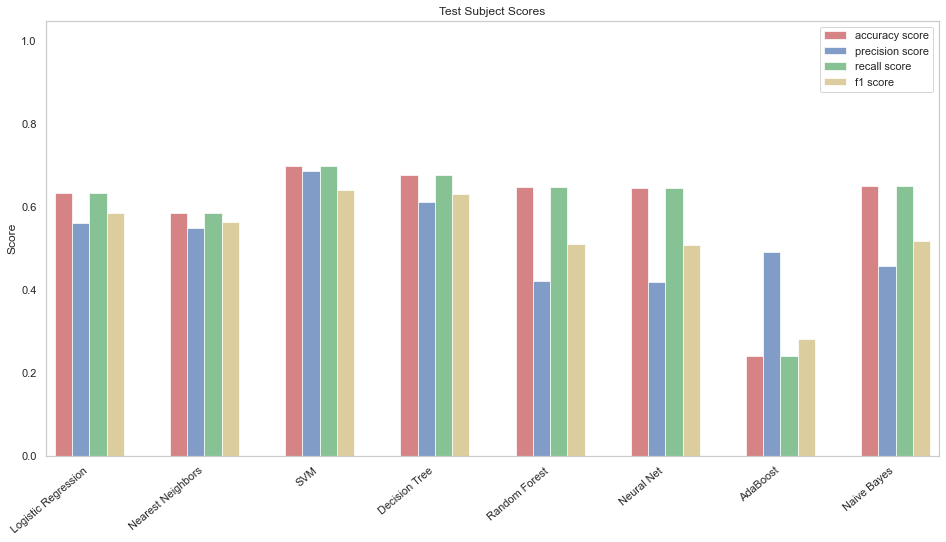

In [533]:

pos = list(range(len(scores[0])))
fig, ax = plt.subplots(figsize=(16,8))
width=0.15
plt.bar(pos, scores[0], width , alpha=0.7, color='r')
plt.bar([p + width for p in pos], scores[1], width, alpha=0.7, color='b')
plt.bar([p + width*2 for p in pos], scores[2], width, alpha=0.7, color='g')
plt.bar([p + width*3 for p in pos], scores[3], width, alpha=0.7, color='y')
    



# Setting the y axis label
ax.set_ylabel('Score')

# Setting the chart's title
ax.set_title('Test Subject Scores')

# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(names)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(scores[0]+ scores[1]+scores[2]+scores[3])*1.5] )

# Adding the legend and showing the plot
plt.legend(['accuracy score', 'precision score', 'recall score','f1 score'], loc='upper right')
plt.grid(None)
plt.show()
fig.show()

#### *It can be clearly observed from above bar graph that SVM is the best classifier among all the models which gave best accuracy, precision, recall and f1 score* 

### *We observe the highest accuracy scores are from SVM and Decision tree and perform ttest* 

In [534]:
from scipy.stats import ttest_ind
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(random_state = 42)
scores_dtc = cross_val_score(clf_dtc,X_test,y_test, scoring='accuracy', cv=KFold(n_splits=10,shuffle=True, random_state=42))
print("\n Decision tree mean = ", scores_dtc.mean())

clf_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
scores_svm = cross_val_score(clf_svm,X_test,y_test, scoring='accuracy', cv=KFold(n_splits=10,shuffle=True, random_state=42))
print("\n Logistic regression mean = ", scores_svm.mean())

from scipy.stats import ttest_ind
t , p = ttest_ind(scores_dtc, scores_svm)
print('t, p : %.4f, %.4f \n' % (t,p))


 Decision tree mean =  0.580188679245283

 Logistic regression mean =  0.6584905660377359
t, p : -4.4571, 0.0003 



#### Since p value less than 0.05, we reject null hypothesis. Both classifiers are statistically significant

# Conclusion

## Movie ratings is directly proportional to the success of a movie.
## There are nine major features which lead to higher movie ratings:

### - Budget of a Movie
### - Production Companies involved in the Movie 
### - Runtime of a Movie
### - Vote Count -  The number of people who spread the word about the movie
### - crew_size - The directors invovled in the movie
### - cast_size - The actors invovled in the movie
### - genre - The genre of the movie
### - Language - The language the movie is released in
### - Title - The title of the movie

## The SVM model gives the best prediction with an accuracy of  about 70%. Which means that given the 9 features, we can predict the success of a movie with 70% accuracy.
